In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [4]:
data = fetch_california_housing()

df = pd.DataFrame(data.data, columns = data.feature_names)
df["Target"] = data.target


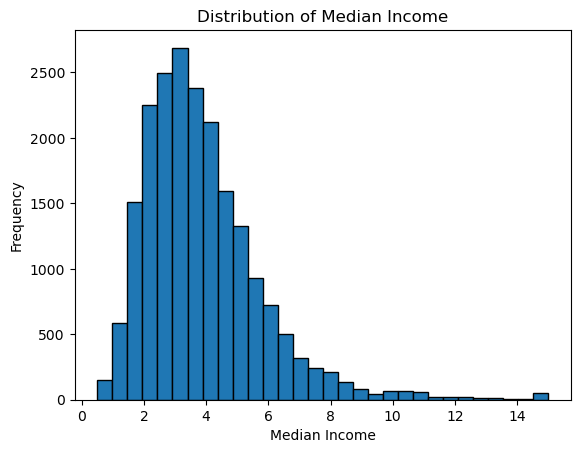

In [7]:
plt.hist(df['MedInc'], bins=30, edgecolor='black')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.title('Distribution of Median Income')
plt.show()


## NOW WE WILL EXTRACT THE DATA, AND ADD BETA, WHICH ARE THE REGRESSION COEFFICIENTS OR 'WEIGHTS' THAT'LL HELP US UNDERSTAND HOW EACH OF THE VARIABLES AFFECT THE TARGET

In [ ]:
x = df.drop(columns=["Target"]).values
y = df["Target"].values.reshape(-1,1)

x = np.c_[np.ones(x.shape[0]), x]


In [ ]:
beta = np.linalg.inv(x.T @ x) @ x.T @ y
beta

array([[-3.69419202e+01],
       [ 4.36693293e-01],
       [ 9.43577803e-03],
       [-1.07322041e-01],
       [ 6.45065694e-01],
       [-3.97638942e-06],
       [-3.78654265e-03],
       [-4.21314378e-01],
       [-4.34513755e-01]])

In [ ]:
y_pred = x @ beta
y_pred

array([[4.13164983],
       [3.97660644],
       [3.67657094],
       ...,
       [0.17125141],
       [0.31910524],
       [0.51580363]])

In [ ]:
mse = np.mean((y - y_pred) ** 2)    # MEAN SQUARED ERROR 
mse

0.5243209861846072

In [ ]:
ss_total = np.sum((y - np.mean(y)) ** 2)  # Total variance
ss_residual = np.sum((y - y_pred) ** 2)  # Unexplained variance
r2 = 1 - (ss_residual / ss_total)
r2                                         # EXPLAINS HOW WELL MODEL EXPLAINS VARIATIONS IN HOUSE PRICES. 

0.606232685199805

In [ ]:
# Define new data (same number of features as training data)
new_data = np.array([[8.0, 20, 6, 5000, 3, 37, -122, 2.5]])  # Example, adjust last value if needed

# Add intercept column (X0 = 1)
new_data = np.c_[np.ones(new_data.shape[0]), new_data]

# Make prediction
predicted_price = new_data @ beta
print(f"Predicted House Price: {predicted_price[0][0]}")


Predicted House Price: 3241.5988327143327
